In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funkcjeCpp as cpp
import os

In [2]:
np.set_printoptions(linewidth=120, precision=3)

In [3]:
def DTW(s,t):
    distanceMatrix=np.zeros((s.size,t.size))
    returnDirection=np.zeros_like(distanceMatrix)
    for i in range(s.size):
        for j in range(t.size):
            if i==0 and j==0:
                minPrev=0
            else:
                minPrev=np.inf
            if i-1>=0 and minPrev>distanceMatrix[i-1,j]:
                minPrev=distanceMatrix[i-1,j]
                returnDirection[i,j]=1
            if i-1>=0 and j-1>=0 and minPrev>distanceMatrix[i-1,j-1]:
                minPrev=distanceMatrix[i-1,j-1]
                returnDirection[i,j]=2
            if j-1>=0 and minPrev>distanceMatrix[i,j-1]:
                minPrev=distanceMatrix[i,j-1]
                returnDirection[i,j]=3
            distanceMatrix[i,j]=np.abs(s[i]-t[j])+minPrev
    return distanceMatrix[s.size-1,t.size-1], returnDirection

In [4]:
def zwrocPrzyporzadkowanieDTW(kierunkiPowrotow):
    n,m=kierunkiPowrotow.shape
    przypS=[[] for i in range(n)]
    przypT=[[] for i in range(m)]
    przypS[n-1].append(m-1)
    przypT[m-1].append(n-1)
    i=n-1
    j=m-1
    while kierunkiPowrotow[i,j]!=0:
        if kierunkiPowrotow[i,j]==1:
            i=i-1
        elif kierunkiPowrotow[i,j]==2:
            i=i-1
            j=j-1
        elif kierunkiPowrotow[i,j]==3:
            j=j-1
        else:
            raise RuntimeError("Niespodziewany kierunek powrotu: {} dla: {},{}".format(kierunkiPowrotow[i,j],i,j))
        przypS[i].append(j)
        przypT[j].append(i)
    return przypS, przypT

In [5]:
def generujPile(n,mnoz, okres):
    t=[(i%okres)*mnoz for i in range(n)]
    return np.array(t)

In [6]:
t1=generujPile(20,2,5)
t2=generujPile(36,1,9)
plt.plot(t1)
plt.plot(t2)

In [7]:
d,powroty=DTW(t1,t2)
print(d)

sP, tP = zwrocPrzyporzadkowanieDTW(powroty)
print(sP)
print(tP)

16.0
[[1, 0], [3, 2], [5, 4], [7, 6], [8], [10, 9], [12, 11], [14, 13], [16, 15], [17], [19, 18], [21, 20], [23, 22], [25, 24], [26], [28, 27], [30, 29], [32, 31], [34, 33], [35]]
[[0], [0], [1], [1], [2], [2], [3], [3], [4], [5], [5], [6], [6], [7], [7], [8], [8], [9], [10], [10], [11], [11], [12], [12], [13], [13], [14], [15], [15], [16], [16], [17], [17], [18], [18], [19]]


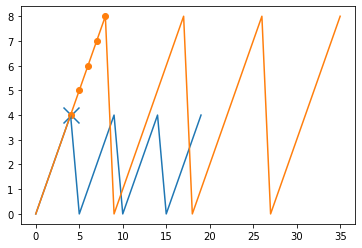

In [8]:
t1=generujPile(20,1,5)
t2=generujPile(36,1,9)
plt.plot(t1)
plt.scatter([4],t1[4],marker='x', s=256)
plt.plot(t2)
plt.scatter([i for i in range(4,9)],t2[4:9])

In [9]:
d,powroty=DTW(t1,t2)
print(d)

sP, tP = zwrocPrzyporzadkowanieDTW(powroty)
print(sP)
print(tP)

40.0
[[0], [1], [2], [3], [8, 7, 6, 5, 4], [9], [10], [11], [12], [17, 16, 15, 14, 13], [18], [19], [20], [21], [26, 25, 24, 23, 22], [27], [28], [29], [30], [35, 34, 33, 32, 31]]
[[0], [1], [2], [3], [4], [4], [4], [4], [4], [5], [6], [7], [8], [9], [9], [9], [9], [9], [10], [11], [12], [13], [14], [14], [14], [14], [14], [15], [16], [17], [18], [19], [19], [19], [19], [19]]


0.0
[[1, 0], [1], [1], [1], [1], [2], [3], [4], [5], [10, 9, 8, 7, 6], [10]]
[[0], [4, 3, 2, 1, 0], [5], [6], [7], [8], [9], [9], [9], [9], [10, 9]]


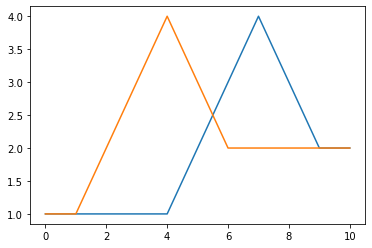

In [10]:
t1=np.array([1,1,1,1,1,2,3,4,3,2,2])
t2=np.array([1,1,2,3,4,3,2,2,2,2,2])
plt.plot(t1)
plt.plot(t2)
d,powroty=DTW(t1,t2)
print(d)

sP, tP = zwrocPrzyporzadkowanieDTW(powroty)
print(sP)
print(tP)

# c

In [4]:
def generujLosowySzeregCzasowy(n, srednia, odch):
    t=np.random.randn(n)*odch+srednia
    t=np.cumsum(t)
    return t

In [5]:
def generujWzorWzorcowychSzeregowCzasowych(N,n, srednia, odch):
    T=[generujLosowySzeregCzasowy(n,srednia,odch) for i in range(N)]
    return np.array(T)

In [6]:
def wprowadzLosoweZaburzenia(wzorce,N,n,przedzialOdchyleniaSkalowania):
    T=[]
    nOrg=wzorce.shape[1]
    zakresPrzesuniecia=max(nOrg-n,0)
    szerokoscPrzedzialuSkalowania=przedzialOdchyleniaSkalowania[1]-przedzialOdchyleniaSkalowania[0]
    print(szerokoscPrzedzialuSkalowania)
    for k in range(wzorce.shape[0]):
        for i in range(N):
            przesuniecie=np.random.randint(low=-zakresPrzesuniecia+1,high=zakresPrzesuniecia)
            if przesuniecie>=0:
                t=wzorce[k,przesuniecie:].copy()
            else:
                t=wzorce[k,:przesuniecie].copy()
            if t.size==0:
                raise RuntimeError(f"Otrzymano ciąg o zerowej długości. Przesunięcie: {przesuniecie}")
            t*=np.random.rand()*szerokoscPrzedzialuSkalowania+przedzialOdchyleniaSkalowania[0]
            T.append(np.asarray(t,dtype=np.float32))
    return T

In [7]:
wzory=generujWzorWzorcowychSzeregowCzasowych(10,75,0,2)
zbiorLosowychSzeregow=wprowadzLosoweZaburzenia(wzory,100,60,(0.75,1.5))

0.75


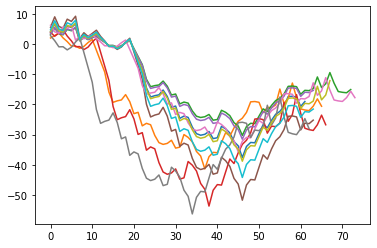

In [40]:
for i in zbiorLosowychSzeregow[:10]:
    plt.plot(i)

# d

In [16]:
wC,powC=cpp.DTWPtr(zbiorLosowychSzeregow[63], zbiorLosowychSzeregow[127])

In [9]:
%%timeit
#Czas działania DTW zaimplmentowanego w C++
wC,powC=cpp.DTWPtr(zbiorLosowychSzeregow[63], zbiorLosowychSzeregow[127])

19.4 µs ± 166 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%%timeit
#Czas działania DTW zaimplmentowanego w Pythonie
wP,powP=DTW(zbiorLosowychSzeregow[63], zbiorLosowychSzeregow[127])

39.8 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
w=zwrocPrzyporzadkowanieDTW(powC)

794 µs ± 7.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


###### Implementacja w Pythonie liczy się około 5h.

In [55]:
%%time
N=len(zbiorLosowychSzeregow)
matrixDTW=np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        matrixDTW[i,j]=cpp.DTWPtr(zbiorLosowychSzeregow[i], zbiorLosowychSzeregow[j])[0]

CPU times: user 11.7 s, sys: 0 ns, total: 11.7 s
Wall time: 11.7 s


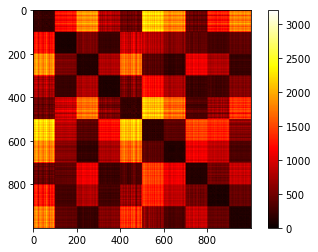

In [56]:
for i in range(N):
    for j in range(0,i):
        matrixDTW[i,j]=matrixDTW[j,i]

plt.imshow(matrixDTW,cmap="hot")
plt.colorbar()

# Zad2

In [44]:
def stworzMapeIndeksowMalychNaDuze(maska):
    a=0
    m={}
    for i in range(maska.size):
        if maska[i]:
            m[a]=i
            a+=1
    return m

In [45]:
def stworzDuzePrzypisanie(mojRozmiar,mapaMoja,mapaDrugiego, przypisanieMale):
    przypD=[]
    ostatniIndeksDuzy=-1
    for i in range(len(przypisanieMale)):
        indeksOrginalny=mapaMoja[i]
        for j in range(ostatniIndeksDuzy+1,indeksOrginalny):
            przypD.append([])
        przetlumaczonePrzypisania=[mapaDrugiego[k] for k in przypisanieMale[i]]
        przypD.append(przetlumaczonePrzypisania)
        ostatniIndeksDuzy=indeksOrginalny
    for i in range(mojRozmiar-len(przypD)):
        przypD.append([])
    return przypD

In [46]:
L=[1,2,3,-4,-5,-6,3,2,1,5]

In [47]:
def zmienPrzypisanie(przypPoprawiane, tPoprawiane, tDrugie, przypDrugie=None, rozmiarPomijania=1):
    if len(przypPoprawiane[0])==0:
        przypPoprawiane[0]=[0]
    if len(przypPoprawiane[-1])==0:
        przypPoprawiane[-1]=[tDrugie.size-1]
    n=len(przypPoprawiane)
    for i in range(1,n-1):
        if len(przypPoprawiane[i])>rozmiarPomijania:
            continue
        j=i-1
        while j>=0:
            if len(przypPoprawiane[j])>0:
                ogrDolne=max(przypPoprawiane[j])
                break
            else:
                j-=1
        else:
            ogrDolne=0
        k=i+1
        while k<n:
            if len(przypPoprawiane[k])>0:
                ogrGorne=min(przypPoprawiane[k])
                break
            else:
                k+=1
        else:
            ogrGorne=tDrugie.size-1
        
        roznice=np.abs(tDrugie[ogrDolne:ogrGorne+1]-tPoprawiane[i])
        ind=np.argmin(roznice)
        #print(i,j,k,ogrDolne,ogrGorne,ind)
        if ind==0:
            przypPoprawiane[i]=[ogrDolne]
            if len(przypPoprawiane[j])>1:
                przypPoprawiane[j].remove(ogrDolne)
        elif ind==ogrGorne-ogrDolne:
            przypPoprawiane[i]=[ogrGorne]
            if len(przypPoprawiane[k])>1:
                przypPoprawiane[k].remove(ogrGorne)
        else:
            przypPoprawiane[i]=[ogrDolne+ind]
        if przypDrugie is not None:
            przypDrugie[ogrDolne+ind].append(i)

In [48]:
def obliczDTWNaPodstawiePrzypisania(przyp, t,tDrugie):
    odl=0
    for i in range(len(przyp)):
        for j in range(len(przyp[i])):
            #print(f"{i} {j}: {t[i]}, {tDrugie[j]}, {odl}")
            odl+=abs(t[i]-tDrugie[przyp[i][j]])
    return odl

In [49]:
def wygenerujeDrugiePrzypisanie(przyp, tDrugie):
    przypDrugie=[[] for i in range(tDrugie.size)]
    for i in range(len(przyp)):
        for j in przyp[i]:
            przypDrugie[j].append(i)
    return przypDrugie

In [50]:
def szybszeDTW(s,t,p=0.5, funkcjaDTW=cpp.DTWPtr):
    """
    p - ppb że pojedyńcze pole z szeregu czasowego zostanie przekazane do DTW, a nie zamaskowane
    """
    maskaS=np.random.choice([True,False],size=s.size,p=[p,1-p])
    maskaT=np.random.choice([True,False],size=t.size,p=[p,1-p])
    
    #print(f"S:{maskaS}")
    #print(f"T:{maskaT}")
    #print()
    
    mapaS=stworzMapeIndeksowMalychNaDuze(maskaS)
    mapaT=stworzMapeIndeksowMalychNaDuze(maskaT)
    
    #print(f"S:{mapaS}")
    #print(f"T:{mapaT}")
    #print()
    
    sMale=s[maskaS]
    tMale=t[maskaT]
    odlDTWMale, powrotMale=funkcjaDTW(sMale,tMale)
    przypS, przypT = zwrocPrzyporzadkowanieDTW(powrotMale)
    
    #print(f"S:{przypS}\n")
    
    duzePrzypS=stworzDuzePrzypisanie(s.size,mapaS,mapaT,przypS)
    
    assert len(duzePrzypS)==s.size
    
    #print(f"S:{duzePrzypS}\n")

    zmienPrzypisanie(duzePrzypS,s,t,rozmiarPomijania=1)
    
    #print(f"S:{duzePrzypS}\n")
    
    zmienPrzypisanie(duzePrzypS,s,t, rozmiarPomijania=0)
    
    #print(f"S:{duzePrzypS}\n")
    
    duzePrzypT=wygenerujeDrugiePrzypisanie(duzePrzypS,t)
    #print(f"T:{duzePrzypT}\n")
    zmienPrzypisanie(duzePrzypT,t,s,przypDrugie=duzePrzypS,rozmiarPomijania=0)
    
    return obliczDTWNaPodstawiePrzypisania(duzePrzypS,s,t), duzePrzypS, duzePrzypT

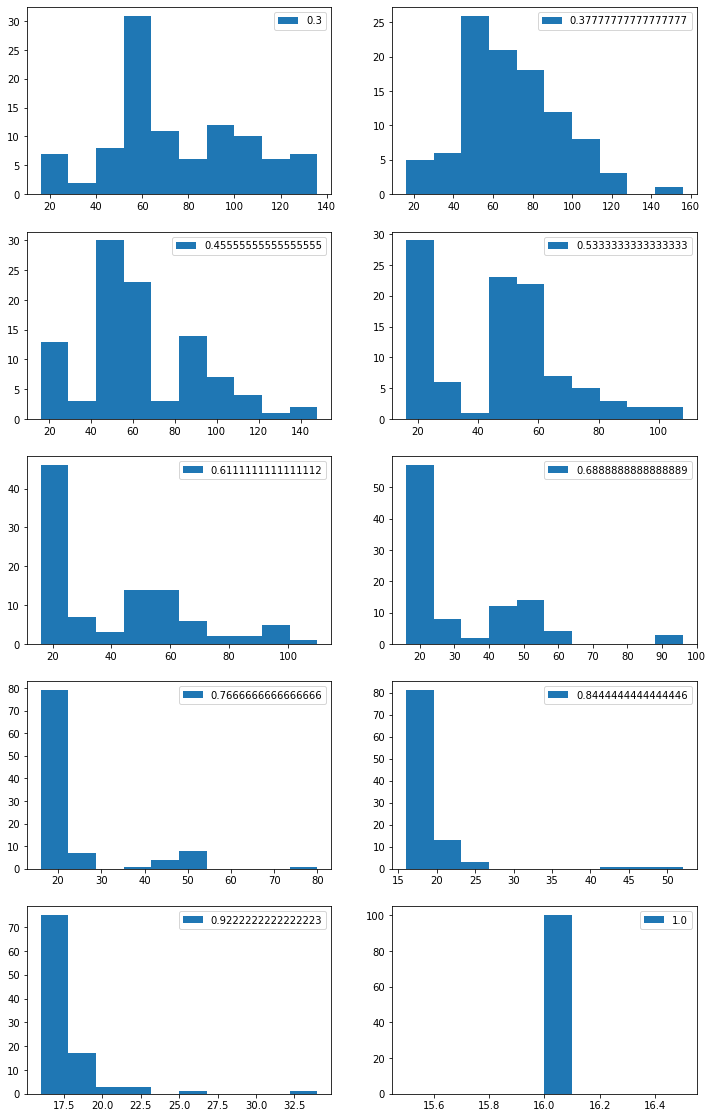

In [51]:
t1=np.array(generujPile(20,2,5),dtype=np.float32)
t2=np.array(generujPile(36,1,9),dtype=np.float32)
plt.gcf().set_size_inches(12,20)
for i,p in enumerate(np.linspace(0.3,1, num=10)):
    plt.subplot(5,2,i+1)
    wyniki=[]
    for j in range(100):
        wyniki.append(szybszeDTW(np.array(t1,dtype=np.float32),np.array(t2,dtype=np.float32), p=p)[0])
    plt.hist(wyniki,label=str(p))
    plt.legend()

In [29]:
%%timeit
DTW(t1,t2)

5.91 ms ± 39.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%%timeit
odl,przypS,przypT = szybszeDTW(t1,t2, p=0.65,funkcjaDTW=DTW)

2.94 ms ± 40.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%%timeit
odl,przypS,przypT = szybszeDTW(t1,t2, p=0.75,funkcjaDTW=DTW)

3.72 ms ± 55.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
odl,przypS,przypT = szybszeDTW(t1,t2, p=0.9,funkcjaDTW=DTW)

5.14 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%%timeit
odl,przypS,przypT = szybszeDTW(t1,t2, p=1.0, funkcjaDTW=DTW)

6.39 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%%time
N=len(zbiorLosowychSzeregow)
matrixSzybkieDTW=np.zeros((N,N))
for i in range(N):
    for j in range(i+1,N):
        matrixSzybkieDTW[i,j]=szybszeDTW(zbiorLosowychSzeregow[i], zbiorLosowychSzeregow[j],p=0.75)[0]

CPU times: user 15min 48s, sys: 375 ms, total: 15min 48s
Wall time: 15min 49s


In [60]:
for i in range(N):
    for j in range(0,i):
        matrixSzybkieDTW[i,j]=matrixSzybkieDTW[j,i]

plt.imshow(matrixSzybkieDTW,cmap="hot")
plt.colorbar()

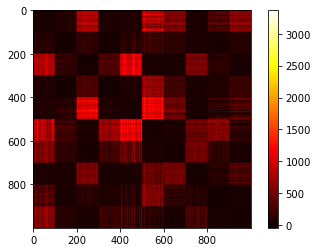

In [61]:
plt.imshow(matrixSzybkieDTW-matrixDTW,cmap="hot")
plt.colorbar()